In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam


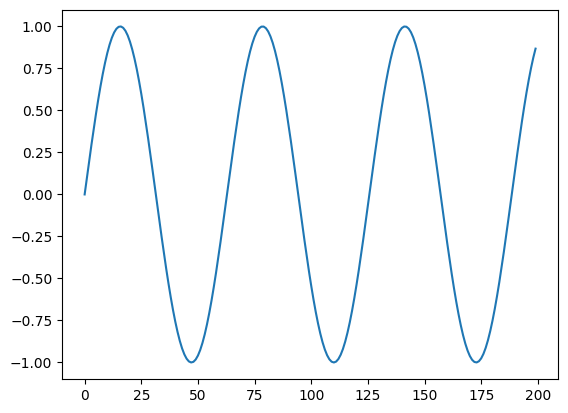

In [9]:
series=np.sin(0.1*np.arange(200))
plt.plot(series)

In [20]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(190, 10) (190,)


In [28]:
#autogenerative linerar model
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1)

)

In [62]:
#training the model
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=250)

Epoch 1/250
5/5 [==============================] - 0s 26ms/step - loss: 7.4141e-15 - val_loss: 7.4026e-15
Epoch 2/250
5/5 [==============================] - 0s 9ms/step - loss: 7.2035e-15 - val_loss: 6.9750e-15
Epoch 3/250
5/5 [==============================] - 0s 14ms/step - loss: 6.1509e-15 - val_loss: 7.0476e-15
Epoch 4/250
5/5 [==============================] - 0s 16ms/step - loss: 6.3927e-15 - val_loss: 6.0198e-15
Epoch 5/250
5/5 [==============================] - 0s 20ms/step - loss: 6.2044e-15 - val_loss: 6.1351e-15
Epoch 6/250
5/5 [==============================] - 0s 20ms/step - loss: 6.1113e-15 - val_loss: 5.7977e-15
Epoch 7/250
5/5 [==============================] - 0s 20ms/step - loss: 6.1912e-15 - val_loss: 5.7847e-15
Epoch 8/250
5/5 [==============================] - 0s 18ms/step - loss: 6.1950e-15 - val_loss: 5.7847e-15
Epoch 9/250
5/5 [==============================] - 0s 19ms/step - loss: 6.1923e-15 - val_loss: 5.7847e-15
Epoch 10/250
5/5 [=============================

Text(0, 0.5, 'loss')

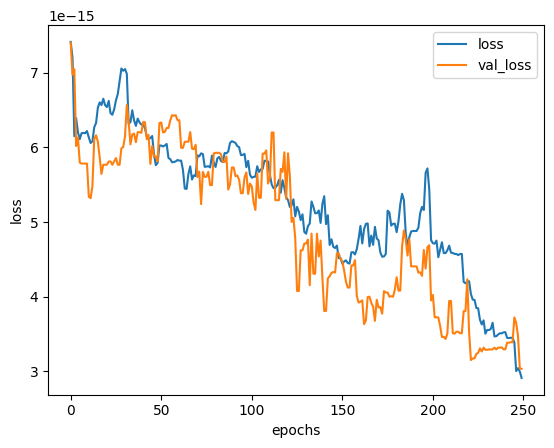

In [63]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("loss")

In [64]:
predicted=model.predict(x_test)


2/2 [==============================] - 0s 5ms/step


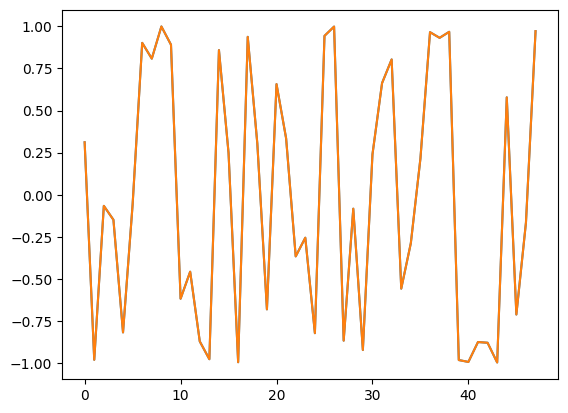

In [65]:
plt.plot(predicted)
plt.plot(y_test)

In [ ]:
SS